#### Model Building
1. select the features
2. Encode to Numerical values
3. Build the model
    Naive model
    Logistic regression
       Label encoded
       one_hot encoded
       Grid Search CV
    Random Forest
4. Tune the model
5. Evaluate the model


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
train  = pd.read_csv('train.csv')
# test   = pd.read_csv('test.csv')
# gender = pd.read_csv('gender_submission.csv')

train_org = train.copy()

In [6]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [51]:
# test.head(3)

In [8]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [9]:
train['Embarked'].fillna('S',inplace=True)
mean_age = round(train['Age'].mean(),1)
train['Age'] = train['Age'].fillna(mean_age)

In [10]:
train['Sex'] = train['Sex'].map({'female':0,'male':1})
# test['Sex'] = test['Sex'].map({'female':0,'male':1})

In [11]:
le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [14]:
X = train[features]

In [15]:
y = train['Survived']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

### Model 1

In [17]:
# Predict all the females Survived

In [18]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
205,3,0,2.0,0,1,10.4625,2
44,3,0,19.0,0,0,7.8792,1
821,3,1,27.0,0,0,8.6625,2
458,2,0,50.0,0,0,10.5000,2
795,2,1,39.0,0,0,13.0000,2
...,...,...,...,...,...,...,...
111,3,0,14.5,1,0,14.4542,0
730,1,0,29.0,0,0,211.3375,2
105,3,1,28.0,0,0,7.8958,2
479,3,0,2.0,0,1,12.2875,2


In [19]:
y_pred = [1 if x==0 else 0 for x in X_test['Sex']]

In [20]:
print("The accuracy is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))

The accuracy is 77.99%


### Model 2

### Applying Logistic regression

In [21]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
y_pred = logreg.predict(X_test)

print("The accuracy is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))

The accuracy is 78.36%


In [24]:
param_grid={"C":[0.001,0.01,0.1,1,10,100,1000]}
param_grid={"C":[0.001,0.01,0.1,1]}

In [25]:
n_folds=5
base = logreg

In [26]:
grid = GridSearchCV(base,param_grid=param_grid,
                    cv = n_folds,
                   scoring = "accuracy")

grid.fit(X_train,y_train)

scores = grid.cv_results_

pd.DataFrame(scores).head()

# plotting accuracies with max_depth
sns.set_style('whitegrid')
plt.figure()
# plt.plot(scores["param_C"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [52]:
# scores of GridSearch CV
# scores = grid.cv_results_
# pd.DataFrame(scores).head()

In [32]:
train = train_org.copy()

In [33]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [34]:
embarked = pd.get_dummies(train['Embarked'],prefix = "embarked",drop_first=True)
embarked

pclass = pd.get_dummies(train['Pclass'],prefix="Pclass",drop_first=True)
pclass

parch = pd.get_dummies(train['Parch'],prefix="Parch",drop_first=True)
parch

train['Parch']

train['Parch'].unique()

train = pd.concat([train,embarked,pclass,parch],axis=1)

In [35]:
train.shape

(891, 22)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_1,embarked_2,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# train['Sex'] = train['Sex'].map({'female':0,'male':1})

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
embarked_1       0
embarked_2       0
Pclass_2         0
Pclass_3         0
Parch_1          0
Parch_2          0
Parch_3          0
Parch_4          0
Parch_5          0
Parch_6          0
dtype: int64

In [38]:
# train['Age'].fillna(mean_age,inplace=True)

In [39]:
# train = train.drop(columns=['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked'])

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,embarked_1,embarked_2,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,1,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,0,1,0,0,0,0,0,0


In [41]:
X = train[features]

In [42]:
y = train['Survived']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [44]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = logreg.predict(X_test)

print("The accuracy is {}%".format(round(accuracy_score(y_pred,y_test)*100,2)))

The accuracy is 78.36%


In [46]:
base = LogisticRegression()

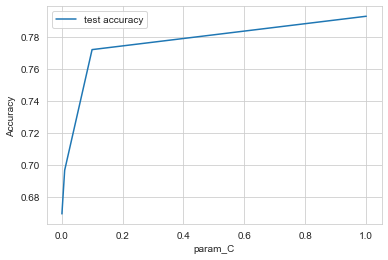

In [47]:
grid = GridSearchCV(base,param_grid=param_grid,
                    cv = n_folds,
                   scoring = "accuracy")

grid.fit(X_train,y_train)

scores = grid.cv_results_

pd.DataFrame(scores).head()

# plotting accuracies with max_depth
sns.set_style('whitegrid')
plt.figure()
# plt.plot(scores["param_C"], 
#          scores["mean_train_score"], 
#          label="training accuracy")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
train = train_org.copy()

In [53]:
rf = RandomForestClassifier()

In [54]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
69,3,1,26.0,2,0,8.6625,2
85,3,0,33.0,3,0,15.8500,2
794,3,1,25.0,0,0,7.8958,2
161,2,0,40.0,0,0,15.7500,2
815,1,1,29.7,0,0,0.0000,2


In [55]:
X_train.isnull().any().any()

False

In [56]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_pred = rf.predict(X_test)

In [59]:
accuracy_score(y_pred,y_test)

0.8208955223880597